In [2]:
import ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.set_printoptions(suppress=True, formatter={'float': '{:.2f}'.format})

In [4]:
seed = np.random.seed(51)

ONLY NUMERICAL FEATURES

In [5]:
numeric = pd.read_csv('data/numeric.csv')
X, y = numeric.iloc[:, :-1], numeric['popularity']

In [6]:
ridge_reg = ridge.RidgeRegression(alpha=1, n_splits=5, random_state=seed)
ridge_reg.fit(X, y)
print(ridge_reg.rmse)

[16.03 16.09 16.18 15.93 16.11]


In [7]:
alphas = []
rmses = []
coefficients = []

for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge_reg = ridge.RidgeRegression(alpha=alpha, n_splits=5, random_state=seed)
    ridge_reg.fit(X, y)

    rmse = ridge_reg.rmse
    coeffs = ridge_reg.weights

    alphas.append(alpha)
    rmses.append(rmse)
    coefficients.append(coeffs)

alphas, rmses, coefficients

([0.01, 0.1, 1, 10, 100],
 [array([16.01, 15.99, 16.05, 16.19, 16.08]),
  array([15.95, 16.08, 16.11, 16.22, 15.98]),
  array([16.08, 16.07, 16.06, 15.94, 16.19]),
  array([16.01, 16.03, 15.98, 16.22, 16.08]),
  array([16.11, 16.03, 16.12, 16.06, 16.04])],
 [array([47.90, -0.00, 4.55, 11.63, -8.59, 0.03, 0.14, -1.00, -19.35, -2.97,
         -10.34, -2.88, -6.66, -0.01, 0.47]),
  array([47.70, -0.00, 4.77, 11.81, -8.17, 0.03, 0.13, -0.95, -19.77, -2.72,
         -10.13, -2.83, -6.68, -0.01, 0.38]),
  array([47.94, -0.00, 4.83, 11.25, -8.56, 0.02, 0.14, -0.97, -19.28, -2.90,
         -10.29, -2.89, -6.27, -0.01, 0.45]),
  array([47.78, -0.00, 4.67, 11.54, -8.33, 0.03, 0.12, -1.01, -19.16, -2.86,
         -10.17, -2.98, -6.58, -0.01, 0.42]),
  array([48.12, -0.00, 4.16, 10.28, -8.47, 0.03, 0.14, -1.02, -16.53, -2.91,
         -9.93, -3.35, -5.90, -0.01, 0.41])])

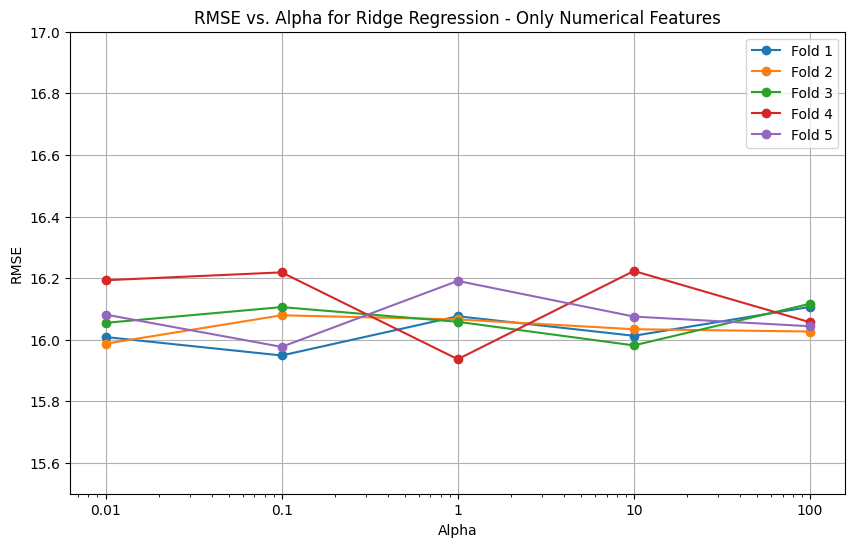

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(alphas, rmses, marker='o', linestyle='-')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs. Alpha for Ridge Regression - Only Numerical Features")
plt.xscale('log')  
plt.xticks(alphas, alphas)
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.grid(True)
plt.ylim((15.5, 17))
plt.show()

ALL FEATURES

In [9]:
complete = pd.read_csv('data/complete.csv')
X2, y2 = complete.iloc[:, :-1], complete['popularity']

In [10]:
ridge_reg2 = ridge.RidgeRegression(alpha=1, n_splits=5, random_state=seed)
ridge_reg2.fit(X2, y2)
print(ridge_reg2.rmse)

[3.54 3.40 3.44 3.47 3.32]


In [11]:
alphas2 = []
rmses2 = []
coefficients2 = []

for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge_reg2 = ridge.RidgeRegression(alpha=alpha, n_splits=5, random_state=seed)
    ridge_reg2.fit(X2, y2)

    rmse2 = ridge_reg2.rmse
    coeffs2 = ridge_reg2.weights

    alphas2.append(alpha)
    rmses2.append(rmse2)
    coefficients2.append(coeffs2)

alphas2, rmses2, coefficients2

([0.01, 0.1, 1, 10, 100],
 [array([3.49, 3.49, 3.39, 3.43, 3.38]),
  array([3.41, 3.36, 3.39, 3.50, 3.53]),
  array([3.41, 3.52, 3.47, 3.37, 3.40]),
  array([3.43, 3.36, 3.42, 3.51, 3.45]),
  array([3.44, 3.46, 3.39, 3.46, 3.42])],
 [array([-0.37, 0.00, 0.13, 0.12, 0.25, 0.00, 0.00, 0.02, -0.30, 0.19,
         -0.03, -0.13, 0.14, -0.00, -0.01, 0.98, 0.02, -0.00]),
  array([-0.30, 0.00, 0.16, 0.07, 0.17, -0.00, 0.00, 0.02, -0.32, 0.16,
         -0.08, -0.03, 0.11, -0.00, 0.01, 0.98, 0.02, -0.00]),
  array([-0.34, 0.00, 0.17, 0.06, 0.15, -0.00, 0.01, -0.00, -0.29, 0.13,
         -0.02, -0.07, 0.20, 0.00, 0.01, 0.98, 0.02, -0.00]),
  array([-0.37, 0.00, 0.15, 0.05, 0.19, 0.00, 0.00, 0.02, -0.26, 0.15,
         -0.06, -0.09, 0.18, -0.00, 0.00, 0.98, 0.02, -0.00]),
  array([-0.30, 0.00, 0.15, 0.01, 0.22, 0.00, 0.00, 0.01, -0.26, 0.17,
         -0.12, -0.13, 0.14, 0.00, 0.00, 0.98, 0.02, -0.00])])

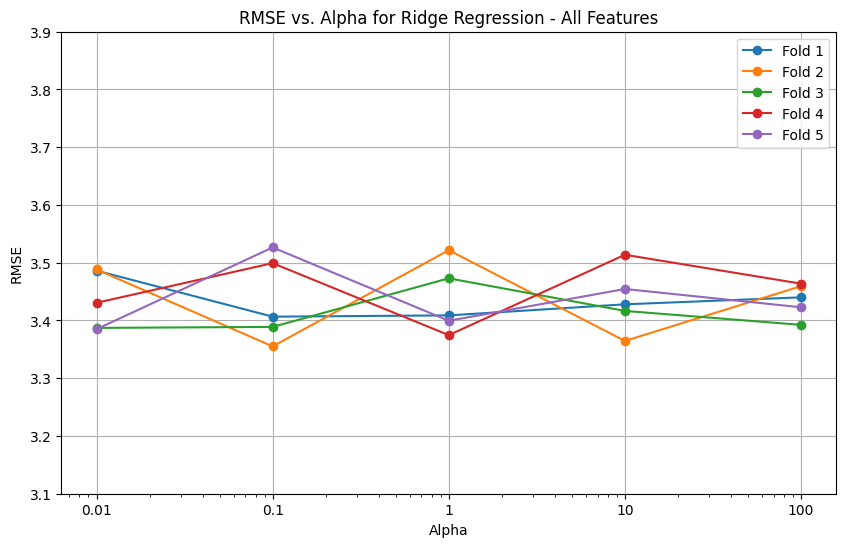

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(alphas2, rmses2, marker='o', linestyle='-')
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.title("RMSE vs. Alpha for Ridge Regression - All Features")
plt.xscale('log')  
plt.xticks(alphas2, alphas2)
plt.legend(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'])
plt.grid(True)
plt.ylim((3.1, 3.9))
plt.show()